# Automated Web Data Extraction Using Selenium  
**Author:** Chao Lu  
**Last update:** 2024/08/27

# Introduction

This script automates the process of searching and downloading geothermal well information PDFs from a specific web portal. It effectively handles web automation with Selenium, ensures that the correct file is downloaded by matching filenames, and performs necessary file operations with error handling. This script can be quite useful for tasks that require batch processing or regular downloads of well information files.

## Import Required Libraries

In this step, we import all necessary libraries for web automation, file handling, and matching filenames.  
**selenium.webdriver:** Used for web automation and interacting with web elements.  
**requests:** Handles the actual downloading of the PDF file.  
**difflib:** Helps in finding the closest matching filename from the search results.  
**os:** Used for file and directory operations.  

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
import difflib
import os

## Define the Main Function

Function: `Geothermal_Well_Info_Download(api_number, target_filename, download_dir)` is defined to automates the process of navigating the NBMG website, searching for a specific well by API number, and downloading the corresponding PDF file. It has three parameters:  
**api_number:** The API number of the geothermal well to search for.  
**target_filename:** The desired filename (or close match) of the PDF file to download.  
**download_dir:** The directory where the PDF file should be saved.  

### Initialize WebDriver  
Define the URL of the webpage to navigate: `search_url = 'https://nbmg.unr.edu/Geothermal/WellInfo.html'`. The script then opens the Chrome browser and navigates to this specific webpage.

### Finding and Interacting with the API Number Input Field

`api_input = driver.find_element(By.NAME, "key1")`: This line uses Selenium to locate the input field on the webpage where the user is supposed to enter the API number. The `find_element` method searches for the element on the page, and `By.NAME` is a locator strategy that searches for an element by its `name` attribute. In this case, it’s looking for an input field with the `name` attribute set to `"key1"`. The located input field is then assigned to the variable `api_input` for further interaction.

To identify the correct keyword for the API number input box, we can use the browser's "Inspect" tool. The figure below shows how we identified the keyword `"key1"`.
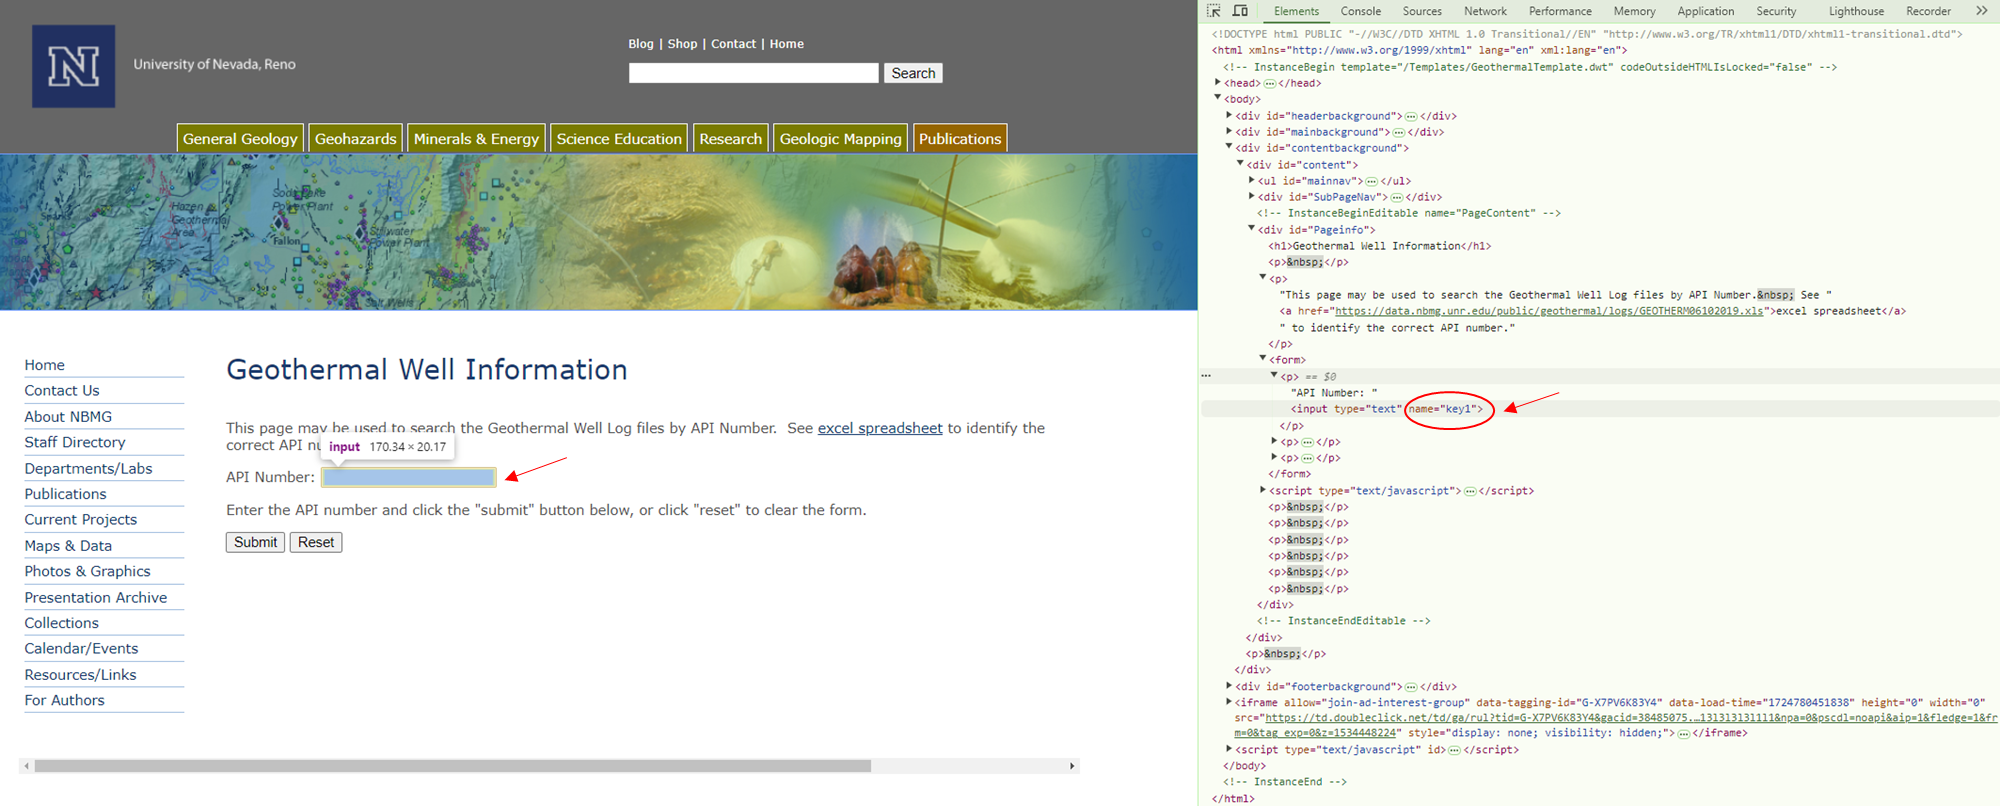


### Finding and Clicking the Submit Button

`submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")`: This line uses Selenium to locate the submit button on the webpage. `By.XPATH` is another locator strategy, which allows you to specify an XPath expression to find an element. The XPath `"//input[@value='Submit']"` searches for an input element where the `value` attribute is `"Submit"`, which is typical for submit buttons. The located submit button is then assigned to the variable `submit_button`.

To identify the correct keyword for the submit button, we can use the browser's "Inspect" tool. The figure above shows how we identified the key value `"Submit"`.  
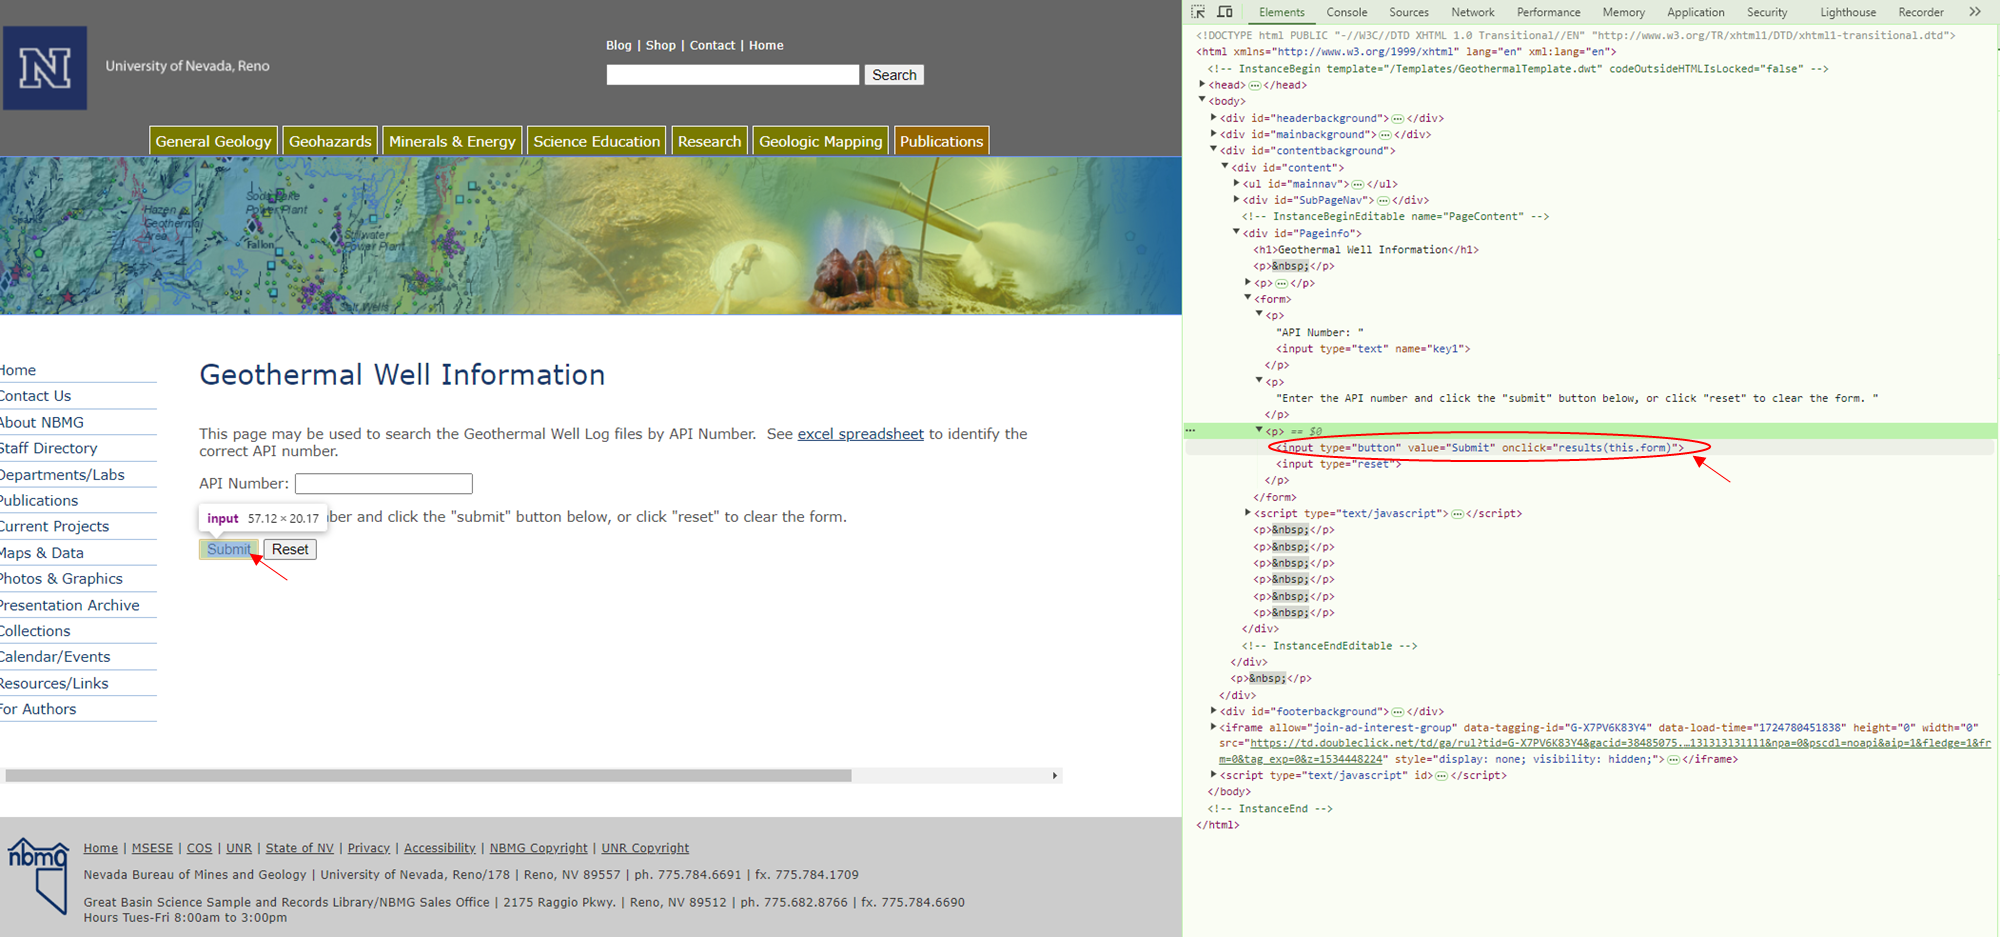

### Finding PDF Links

`pdf_links = driver.find_elements(By.XPATH, "//a[contains(@href, '.pdf')]")`: This line of code uses Selenium to search the webpage for all links that point to PDF files by looking for `<a>` elements with `href` attributes containing `.pdf`. The located links are then stored in the variable `pdf_links`.

To identify the correct keywords for the file links, we can use the browser's "Inspect" tool. The figure above shows how we identified the `href` attributes and the corresponding `<a>` elements.  
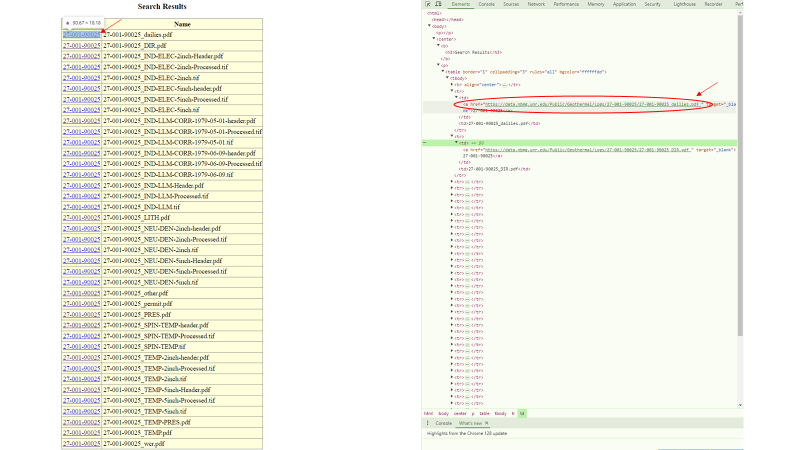

### The Complete Function

In [2]:
def Geothermal_Well_Info_Download(api_number, target_filename, download_dir):
    search_url = 'https://nbmg.unr.edu/Geothermal/WellInfo.html'
    driver = webdriver.Chrome()
    downloaded_file_name = None
    
    try:
        driver.get(search_url)
        print("Waiting for the page to load completely...")
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.NAME, "key1"))
        )
        print("Page loaded.")

        print("Finding the API number input field...")
        api_input = driver.find_element(By.NAME, "key1")
        print("API number input field found.")
        api_input.clear()
        api_input.send_keys(api_number)

        print("Finding the submit button...")
        submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
        print("Submit button found.")
        submit_button.click()

        print("Waiting for the search results to load...")
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, "//table"))
        )
        print("Search results loaded.")

        # Find all the PDF links in the search results
        pdf_links = driver.find_elements(By.XPATH, "//a[contains(@href, '.pdf')]")
        pdf_urls = [link.get_attribute('href') for link in pdf_links]
        pdf_filenames = [url.split('/')[-1] for url in pdf_urls]

        # Find the best matching PDF file based on the target_filename
        best_match = difflib.get_close_matches(target_filename, pdf_filenames, n=1, cutoff=0.1)
        if best_match:
            matching_filename = best_match[0]
            matching_url = [url for url in pdf_urls if matching_filename in url][0]
            if not os.path.exists(download_dir):
                os.makedirs(download_dir)
            download_path = os.path.join(download_dir, matching_filename)
            download_pdf(matching_url, download_path)
            downloaded_file_name = matching_filename
        else:
            print(f"No PDF file found matching {target_filename}.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        driver.quit()
    
    return downloaded_file_name

## Define the PDF Download Helper Function

This helper function takes care of downloading the PDF file from the URL and saving it to the specified directory.

In [3]:
def download_pdf(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded: {filename}")

## Example Usage

Finally, we provide an example of how to use the function to download a PDF file for a specific well.

In [4]:
# Example usage
if __name__ == "__main__":
    api_number = '27-001-90025'
    target_filename = '27-001-90025_TEMP-5inch'
    download_dir = r'C:\Users\chaolu\Project folder\USGS Data Preservation 2024 Grant\data\las_qa'
    downloaded_file = Geothermal_Well_Info_Download(api_number, target_filename, download_dir)
    print(f"Downloaded file: {downloaded_file}")

Waiting for the page to load completely...
Page loaded.
Finding the API number input field...
API number input field found.
Finding the submit button...
Submit button found.
Waiting for the search results to load...
Search results loaded.
Downloaded: C:\Users\chaolu\Project folder\USGS Data Preservation 2024 Grant\data\las_qa\27-001-90025_TEMP-5inch-Header.pdf
Downloaded file: 27-001-90025_TEMP-5inch-Header.pdf
